In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/mushfiqulIslam/mltraining/master/icc-test-cricket-runs/ICC%20Test%20Batting%20Figures.csv'
data = pd.read_csv(url, encoding = "ISO-8859-1")

# Data Cleaning

In [3]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 13 columns):
Player            3001 non-null object
Span              3001 non-null object
Mat               3001 non-null int64
Inn               3001 non-null object
NO                3001 non-null object
Runs              3001 non-null object
HS                3001 non-null object
Avg               3001 non-null object
100               3001 non-null object
50                3001 non-null object
0                 3001 non-null object
Player Profile    3001 non-null object
Country           3001 non-null object
dtypes: int64(1), object(12)
memory usage: 304.9+ KB


In [4]:
data['Player'] = data['Player'].str.replace("\xa0", " ")
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [5]:
data['Country'] = data.Player.str.extract("\(([\w/]+)\)")
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...,INDIA
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...,AUS
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...,ICC/SA
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...,ICC/INDIA
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...,ENG


In [6]:
data['Mat'] = data['Mat'].astype(int)
data = data.replace(to_replace ='-', 
                 value ="0")
data['Inn'] = data['Inn'].astype(int)
data['NO'] = data['NO'].astype(int)
data['Runs'] = data['Runs'].astype(int)
data['Avg'] = data['Avg'].astype(float)
data['100'] = data['100'].astype(int)
data['50'] = data['50'].astype(int)
data['0'] = data['0'].astype(int)

In [ ]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...,INDIA
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...,AUS
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...,ICC/SA
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...,ICC/INDIA
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...,ENG


In [ ]:
data.dtypes

Player             object
Span               object
Mat                 int64
Inn                 int64
NO                  int64
Runs                int64
HS                 object
Avg               float64
100                 int64
50                  int64
0                   int64
Player Profile     object
Country            object
dtype: object

In [ ]:
data.Country.value_counts()

ENG          684
AUS          452
SA           335
WI           318
INDIA        290
NZ           275
PAK          235
SL           149
ZIM          106
BDESH         95
AFG           19
IRE           16
AUS/ENG        5
INDIA/PAK      3
ICC/SA         3
ENG/SA         2
ICC/INDIA      2
ENG/ICC        2
ICC/NZ         1
ICC/PAK        1
ICC/WI         1
NZ/WI          1
AUS/SA         1
SA/ZIM         1
3              1
ENG/INDIA      1
ICC/SL         1
ENG/IRE        1
Name: Country, dtype: int64

In [7]:
data['Country'] = data['Country'].str.replace("ICC/", "")
data['Country'] = data['Country'].str.replace("/ICC", "")
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...,INDIA
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...,AUS
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...,SA
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...,INDIA
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...,ENG


In [ ]:
data.loc[data['Country'] == '3']

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
2113,Mohammad Nawaz (3) (PAK),2016-2016,3,4,0,50,25,12.5,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,3


In [8]:
data.loc[2113, 'Country'] = 'PAK'

In [ ]:
'3' in data['Country']

False

# Country wise seperate players 

**Played for England**

In [ ]:
eng0 = data.loc[data['Country'] == 'ENG']
aus_eng = data.loc[data['Country'] == 'AUS/ENG']
eng_sa = data.loc[data['Country'] == 'ENG/SA']
eng_ind = data.loc[data['Country'] == 'ENG/INDIA']
eng_ire = data.loc[data['Country'] == 'ENG/IRE']
eng = eng0.append([aus_eng, eng_sa, eng_ind, eng_ire])
eng

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...,ENG
15,GA Gooch (ENG),1975-1995,118,215,6,8900,333,42.58,20,46,13,http://stats.espncricinfo.com/ci/content/playe...,ENG
24,AJ Stewart (ENG),1990-2003,133,235,21,8463,190,39.54,15,45,14,http://stats.espncricinfo.com/ci/content/playe...,ENG
25,DI Gower (ENG),1978-1992,117,204,18,8231,215,44.25,18,39,7,http://stats.espncricinfo.com/ci/content/playe...,ENG
26,KP Pietersen (ENG),2005-2014,104,181,8,8181,227,47.28,23,35,10,http://stats.espncricinfo.com/ci/content/playe...,ENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,JJ Ferris (AUS/ENG),1887-1892,9,17,4,114,20*,8.76,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,AUS/ENG
1459,F Hearne (ENG/SA),1889-1896,6,10,0,168,30,16.80,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,ENG/SA
1646,F Mitchell (ENG/SA),1899-1912,5,10,0,116,41,11.60,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,ENG/SA
1376,Nawab of Pataudi snr (ENG/INDIA),1932-1946,6,10,0,199,102,19.90,1,0,0,http://stats.espncricinfo.com/ci/content/playe...,ENG/INDIA


**Played for Australia**

In [ ]:
aus = data.loc[data['Country'] == 'AUS']
aus_sa = data.loc[data['Country'] == 'AUS/SA']
aus = aus.append([aus_eng, aus_sa])
aus

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...,AUS
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,http://stats.espncricinfo.com/ci/content/playe...,AUS
10,SR Waugh (AUS),1985-2004,168,260,46,10927,200,51.06,32,50,22,http://stats.espncricinfo.com/ci/content/playe...,AUS
20,MJ Clarke (AUS),2004-2015,115,198,22,8643,329*,49.10,28,27,9,http://stats.espncricinfo.com/ci/content/playe...,AUS
21,ML Hayden (AUS),1994-2009,103,184,14,8625,380,50.73,30,29,14,http://stats.espncricinfo.com/ci/content/playe...,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,WE Midwinter (AUS/ENG),1877-1887,12,21,1,269,37,13.45,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,AUS/ENG
1288,AE Trott (AUS/ENG),1895-1899,5,9,3,228,85*,38.00,0,2,2,http://stats.espncricinfo.com/ci/content/playe...,AUS/ENG
1503,SMJ Woods (AUS/ENG),1888-1896,6,10,0,154,53,15.40,0,1,2,http://stats.espncricinfo.com/ci/content/playe...,AUS/ENG
1655,JJ Ferris (AUS/ENG),1887-1892,9,17,4,114,20*,8.76,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,AUS/ENG


**Played for South Africa**

In [ ]:
sa = data.loc[data['Country'] == 'SA']
sa_zim = data.loc[data['Country'] == 'SA/ZIM']
sa = sa.append([eng_sa, aus_sa, sa_zim])
sa

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...,SA
13,HM Amla (SA),2004-2019,124,215,16,9282,311*,46.64,28,41,13,http://stats.espncricinfo.com/ci/content/playe...,SA
14,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,27,38,11,http://stats.espncricinfo.com/ci/content/playe...,SA
19,AB de Villiers (SA),2004-2018,114,191,18,8765,278*,50.66,22,46,8,http://stats.espncricinfo.com/ci/content/playe...,SA
41,G Kirsten (SA),1993-2004,101,176,15,7289,275,45.27,21,34,13,http://stats.espncricinfo.com/ci/content/playe...,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,CM Willoughby (SA),2003-2003,2,0,0,0,0,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,SA
1459,F Hearne (ENG/SA),1889-1896,6,10,0,168,30,16.80,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,ENG/SA
1646,F Mitchell (ENG/SA),1899-1912,5,10,0,116,41,11.60,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,ENG/SA
215,KC Wessels (AUS/SA),1982-1994,40,71,3,2788,179,41.00,6,15,5,http://stats.espncricinfo.com/ci/content/playe...,AUS/SA


**Played for West Indies**

In [ ]:
wi = data.loc[data['Country'] == 'WI']
nz_wi = data.loc[data['Country'] == 'NZ/WI']
wi = wi.append(nz_wi)
wi

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17,http://stats.espncricinfo.com/ci/content/playe...,WI
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15,http://stats.espncricinfo.com/ci/content/playe...,WI
23,IVA Richards (WI),1974-1991,121,182,12,8540,291,50.23,24,45,10,http://stats.espncricinfo.com/ci/content/playe...,WI
28,GS Sobers (WI),1954-1974,93,160,21,8032,365*,57.78,26,30,12,http://stats.espncricinfo.com/ci/content/playe...,WI
34,CG Greenidge (WI),1974-1991,108,185,16,7558,226,44.72,19,34,11,http://stats.espncricinfo.com/ci/content/playe...,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,KK Peters (WI),2014-2014,1,1,0,0,0,0.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,WI
2965,LA Roberts (WI),1999-1999,1,1,0,0,0,0.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,WI
2987,AB Howard (WI),1972-1972,1,0,0,0,0,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,WI
2990,LR Pierre (WI),1948-1948,1,0,0,0,0,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,WI



**Played for India**

In [ ]:
ind = data.loc[data['Country'] == 'INDIA']
ind_pak = data.loc[data['Country'] == 'INDIA/PAK']
ind = ind.append([eng_ind, ind_pak])
ind

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...,INDIA
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...,INDIA
11,SM Gavaskar (INDIA),1971-1987,125,214,16,10122,236*,51.12,34,45,12,http://stats.espncricinfo.com/ci/content/playe...,INDIA
18,VVS Laxman (INDIA),1996-2012,134,225,34,8781,281,45.97,17,56,14,http://stats.espncricinfo.com/ci/content/playe...,INDIA
22,V Sehwag (ICC/INDIA),2001-2013,104,180,6,8586,319,49.34,23,32,16,http://stats.espncricinfo.com/ci/content/playe...,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,VN Swamy (INDIA),1955-1955,1,0,0,0,0,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,INDIA
1376,Nawab of Pataudi snr (ENG/INDIA),1932-1946,6,10,0,199,102,19.90,1,0,0,http://stats.espncricinfo.com/ci/content/playe...,ENG/INDIA
587,AH Kardar (INDIA/PAK),1946-1958,26,42,3,927,93,23.76,0,5,2,http://stats.espncricinfo.com/ci/content/playe...,INDIA/PAK
1353,Gul Mohammad (INDIA/PAK),1946-1956,9,17,1,205,34,12.81,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,INDIA/PAK


**Played for New Zealand**

In [ ]:
nz = data.loc[data['Country'] == 'NZ']
nz = nz.append(nz_wi)
nz

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
46,SP Fleming (NZ),1994-2008,111,189,10,7172,274*,40.06,9,46,16,http://stats.espncricinfo.com/ci/content/playe...,NZ
48,LRPL Taylor (NZ),2007-2019,98,173,20,7130,290,46.60,19,33,14,http://stats.espncricinfo.com/ci/content/playe...,NZ
58,BB McCullum (NZ),2004-2016,101,176,9,6453,302,38.64,12,31,14,http://stats.espncricinfo.com/ci/content/playe...,NZ
59,KS Williamson (NZ),2010-2019,78,137,13,6379,242*,51.44,21,31,9,http://stats.espncricinfo.com/ci/content/playe...,NZ
83,MD Crowe (NZ),1982-1995,77,131,11,5444,299,45.36,17,18,9,http://stats.espncricinfo.com/ci/content/playe...,NZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,LA Butterfield (NZ),1946-1946,1,2,0,0,0,0.00,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,NZ
2950,IB Leggat (NZ),1954-1954,1,1,0,0,0,0.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,NZ
2966,CG Rowe (NZ),1946-1946,1,2,0,0,0,0.00,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,NZ
2996,CA Snedden (NZ),1947-1947,1,0,0,0,0,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,NZ


**Played for Pakistan**

In [ ]:
 pak = data.loc[data['Country'] == 'PAK']
 pak = pak.append(ind_pak)
 pak

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
12,Younis Khan (PAK),2000-2017,118,213,19,10099,313,52.05,34,33,19,http://stats.espncricinfo.com/ci/content/playe...,PAK
16,Javed Miandad (PAK),1976-1993,124,189,21,8832,280*,52.57,23,43,6,http://stats.espncricinfo.com/ci/content/playe...,PAK
17,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200,22,8830,329,49.60,25,46,15,http://stats.espncricinfo.com/ci/content/playe...,PAK
35,Mohammad Yousuf (PAK),1998-2010,90,156,12,7530,223,52.29,24,33,11,http://stats.espncricinfo.com/ci/content/playe...,PAK
68,Azhar Ali (PAK),2010-2019,77,146,8,5885,302*,42.64,16,31,14,http://stats.espncricinfo.com/ci/content/playe...,PAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Shahid Mahboob (PAK),1989-1989,1,0,0,0,0,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,PAK
2998,Usman Shinwari (PAK),2019-2019,1,0,0,0,0,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,PAK
587,AH Kardar (INDIA/PAK),1946-1958,26,42,3,927,93,23.76,0,5,2,http://stats.espncricinfo.com/ci/content/playe...,INDIA/PAK
1353,Gul Mohammad (INDIA/PAK),1946-1956,9,17,1,205,34,12.81,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,INDIA/PAK


**Played for Srilanka**

In [ ]:
 sl = data.loc[data['Country'] == 'SL']
 icc_sl = data.loc[data['Country'] == 'ICC/SL']
 sl = sl.append(icc_sl)
 sl

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.40,38,52,11,http://stats.espncricinfo.com/ci/content/playe...,SL
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,http://stats.espncricinfo.com/ci/content/playe...,SL
53,ST Jayasuriya (SL),1991-2007,110,188,14,6973,340,40.07,14,31,15,http://stats.espncricinfo.com/ci/content/playe...,SL
60,PA de Silva (SL),1984-2002,93,159,11,6361,267,42.97,20,22,7,http://stats.espncricinfo.com/ci/content/playe...,SL
77,AD Mathews (SL),2009-2019,84,151,21,5704,160,43.87,9,34,2,http://stats.espncricinfo.com/ci/content/playe...,SL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,BR Jurangpathy (SL),1985-1986,2,4,0,1,1,0.25,0,0,3,http://stats.espncricinfo.com/ci/content/playe...,SL
2929,MKDI Amerasinghe (SL),2008-2008,1,2,2,0,0*,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,SL
2940,RPW Guneratne (SL),1983-1983,1,2,2,0,0*,0.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,SL
2945,D Hettiarachchi (SL),2001-2001,1,2,1,0,0*,0.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,SL


**Played for Zimbabwe**

In [ ]:
zim = data.loc[data['Country'] == 'ZIM']
zim = zim.append(sa_zim)
zim

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
99,A Flower (ZIM),1992-2002,63,112,19,4794,232*,51.54,12,27,5,http://stats.espncricinfo.com/ci/content/playe...,ZIM
166,GW Flower (ZIM),1992-2004,67,123,6,3457,201*,29.54,6,15,16,http://stats.espncricinfo.com/ci/content/playe...,ZIM
208,ADR Campbell (ZIM),1992-2002,60,109,4,2858,103,27.21,2,18,10,http://stats.espncricinfo.com/ci/content/playe...,ZIM
278,H Masakadza (ZIM),2001-2018,38,76,2,2223,158,30.04,5,8,10,http://stats.espncricinfo.com/ci/content/playe...,ZIM
279,GJ Whittall (ZIM),1993-2002,46,82,7,2207,203*,29.42,4,10,6,http://stats.espncricinfo.com/ci/content/playe...,ZIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,TK Musakanda (ZIM),2017-2017,1,2,0,6,6,3.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,ZIM
2803,TP Kamungozi (ZIM),2014-2014,1,2,0,5,5,2.50,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,ZIM
2834,MP Jarvis (ZIM),1992-1994,5,3,1,4,2*,2.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,ZIM
2904,MT Chinouya (ZIM),2016-2016,2,4,2,1,1,0.50,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,ZIM


**Played for Bangladesh**

In [ ]:
bdesh = data.loc[data['Country'] == 'BDESH']
bdesh

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
120,Tamim Iqbal (BDESH),2008-2019,58,112,1,4327,206,38.98,9,27,8,http://stats.espncricinfo.com/ci/content/playe...,BDESH
124,Mushfiqur Rahim (BDESH),2005-2019,69,129,9,4210,219*,35.08,6,21,11,http://stats.espncricinfo.com/ci/content/playe...,BDESH
136,Shakib Al Hasan (BDESH),2007-2019,56,105,7,3862,217,39.40,5,24,4,http://stats.espncricinfo.com/ci/content/playe...,BDESH
193,Habibul Bashar (BDESH),2000-2008,50,99,1,3026,113,30.87,3,24,7,http://stats.espncricinfo.com/ci/content/playe...,BDESH
225,Mahmudullah (BDESH),2009-2019,48,91,6,2739,146,32.22,4,16,10,http://stats.espncricinfo.com/ci/content/playe...,BDESH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,Mahbubul Alam (BDESH),2008-2008,4,7,3,5,2,1.25,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,BDESH
2827,Ebadat Hossain (BDESH),2019-2019,4,8,2,4,2,0.66,0,0,3,http://stats.espncricinfo.com/ci/content/playe...,BDESH
2838,Nazmul Islam (BDESH),2018-2018,1,2,0,4,4,2.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,BDESH
2843,Khaled Ahmed (BDESH),2018-2019,2,2,1,4,4*,4.00,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,BDESH


**Played for Afghanistan**

In [ ]:
afg = data.loc[data['Country'] == 'AFG']
afg

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
1142,Rahmat Shah (AFG),2018-2019,4,8,0,298,102,37.25,1,2,2,http://stats.espncricinfo.com/ci/content/playe...,AFG
1227,Asghar Afghan (AFG),2018-2019,4,7,0,249,92,35.57,0,3,1,http://stats.espncricinfo.com/ci/content/playe...,AFG
1525,Ibrahim Zadran (AFG),2019-2019,2,4,0,148,87,37.00,0,1,0,http://stats.espncricinfo.com/ci/content/playe...,AFG
1561,Hashmatullah Shahidi (AFG),2018-2019,3,6,2,138,61,34.50,0,1,0,http://stats.espncricinfo.com/ci/content/playe...,AFG
1569,Afsar Zazai (AFG),2018-2019,3,6,1,135,48*,27.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,AFG
1678,Ihsanullah (AFG),2019-2019,3,6,1,110,65*,22.00,0,1,0,http://stats.espncricinfo.com/ci/content/playe...,AFG
1700,Rashid Khan (AFG),2018-2019,4,7,0,106,51,15.14,0,1,0,http://stats.espncricinfo.com/ci/content/playe...,AFG
1704,Javed Ahmadi (AFG),2018-2019,2,4,0,105,62,26.25,0,1,0,http://stats.espncricinfo.com/ci/content/playe...,AFG
1940,Mohammad Shahzad (AFG),2018-2019,2,4,0,69,40,17.25,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,AFG
2252,Amir Hamza (AFG),2019-2019,1,2,0,35,34,17.50,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,AFG


**Played for Ireland**

In [ ]:
ire = data.loc[data['Country'] == 'IRE']
ire = ire.append(eng_ire)
ire

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
1205,KJ O'Brien (IRE),2018-2019,3,6,1,258,118,51.60,1,1,0,http://stats.espncricinfo.com/ci/content/playe...,IRE
1533,A Balbirnie (IRE),2018-2019,3,6,0,146,82,24.33,0,2,2,http://stats.espncricinfo.com/ci/content/playe...,IRE
1681,TJ Murtagh (IRE),2018-2019,3,6,2,109,54*,27.25,0,1,0,http://stats.espncricinfo.com/ci/content/playe...,IRE
1711,PR Stirling (IRE),2018-2019,3,6,0,104,36,17.33,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,IRE
1903,JA McCollum (IRE),2019-2019,2,4,0,73,39,18.25,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,IRE
1974,GH Dockrell (IRE),2019-2019,1,2,0,64,39,32.00,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,IRE
1981,SR Thompson (IRE),2018-2019,3,6,0,64,53,10.66,0,1,1,http://stats.espncricinfo.com/ci/content/playe...,IRE
2031,WTS Porterfield (IRE),2018-2019,3,6,0,58,32,9.66,0,0,1,http://stats.espncricinfo.com/ci/content/playe...,IRE
2134,EC Joyce (IRE),2018-2018,1,2,0,47,43,23.50,0,0,0,http://stats.espncricinfo.com/ci/content/playe...,IRE
2159,GC Wilson (IRE),2018-2019,2,4,1,45,33*,15.00,0,0,2,http://stats.espncricinfo.com/ci/content/playe...,IRE


In [ ]:
country = ['INDIA', 'AUS', 'SA', 'ENG', 'SL', 'WI', 'PAK', 'NZ', 'ZIM',
       'BDESH', 'AFG', 'IRE']

country_50s = [ind['50'].sum(), aus['50'].sum(), sa['50'].sum(),
               eng['50'].sum(), sl['50'].sum(), wi['50'].sum(),
               pak['50'].sum(), nz['50'].sum(), zim['50'].sum(),
               bdesh['50'].sum(), afg['50'].sum(), ire['50'].sum()]

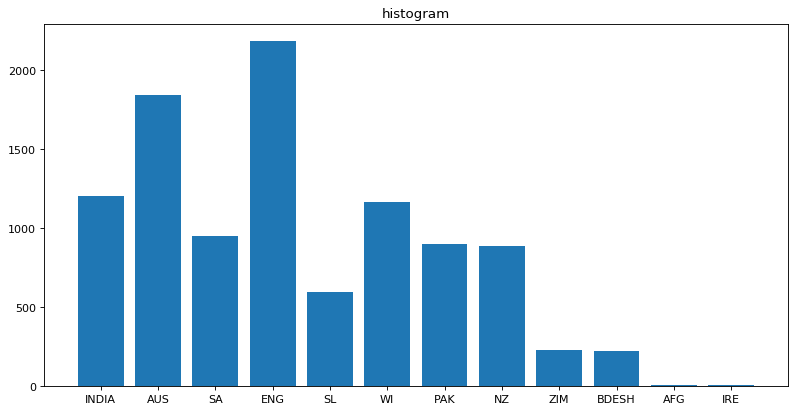

In [ ]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(country, country_50s) 
plt.title("histogram") 
plt.show()

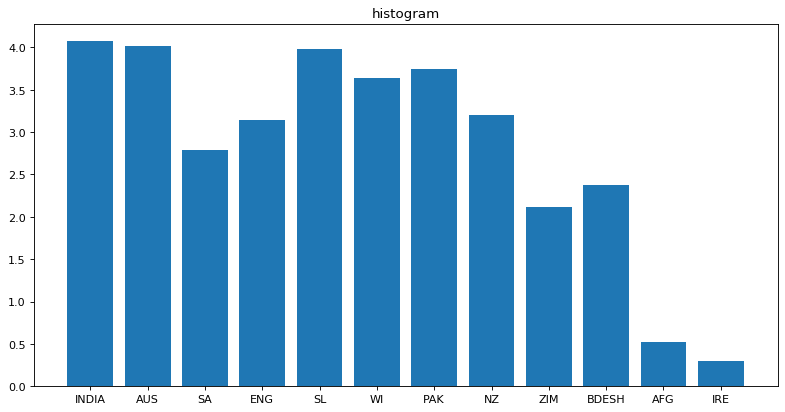

In [ ]:
country_50s_avg = [ind['50'].sum()/ind['50'].count(), aus['50'].sum()/aus['50'].count(), sa['50'].sum()/sa['50'].count(),
               eng['50'].sum()/eng['50'].count(), sl['50'].sum()/sl['50'].count(), wi['50'].sum()/wi['50'].count(),
               pak['50'].sum()/pak['50'].count(), nz['50'].sum()/nz['50'].count(), zim['50'].sum()/zim['50'].count(),
               bdesh['50'].sum()/bdesh['50'].count(), afg['50'].sum()/afg['50'].count(), ire['50'].sum()/ire['50'].count()]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(country, country_50s_avg) 
plt.title("histogram") 
plt.show()

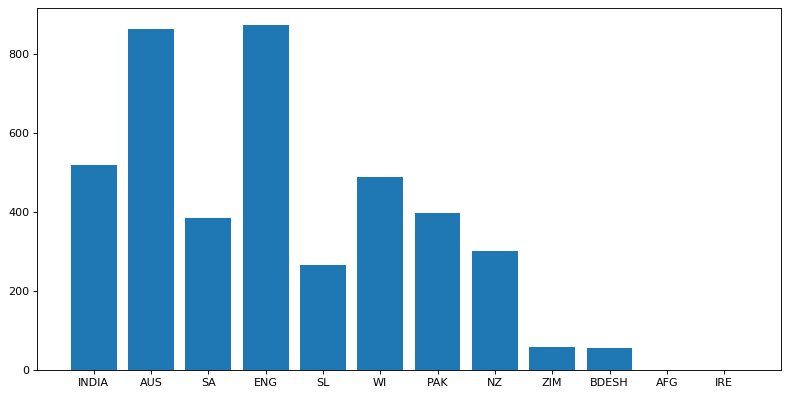

In [ ]:
country_100s = [ind['100'].sum(), aus['100'].sum(), sa['100'].sum(),
               eng['100'].sum(), sl['100'].sum(), wi['100'].sum(),
               pak['100'].sum(), nz['100'].sum(), zim['100'].sum(),
               bdesh['100'].sum(), afg['100'].sum(), ire['100'].sum()]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(country, country_100s) 
plt.show()

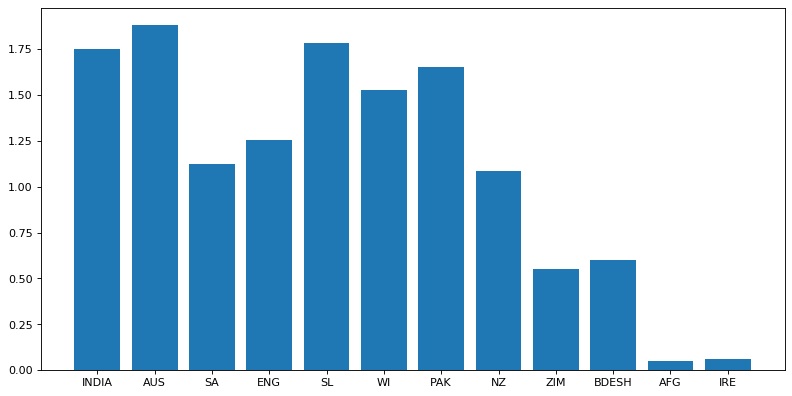

In [ ]:
country_100s_avg = [ind['100'].sum()/ind['100'].count(), aus['100'].sum()/aus['100'].count(), sa['100'].sum()/sa['100'].count(),
               eng['100'].sum()/eng['100'].count(), sl['100'].sum()/sl['100'].count(), wi['100'].sum()/wi['100'].count(),
               pak['100'].sum()/pak['100'].count(), nz['100'].sum()/nz['100'].count(), zim['100'].sum()/zim['100'].count(),
               bdesh['100'].sum()/bdesh['100'].count(), afg['100'].sum()/afg['100'].count(), ire['100'].sum()/ire['100'].count()]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(country, country_100s_avg) 
plt.show()

# Top Ten Batsman By Avg

In [10]:
def top_ten_batsman_by_avg(data):
    match_played_more_than50 = data.loc[data['Mat'] >= 50]
    match_played_more_than50['Avg'] = match_played_more_than50['Avg'].astype(float).round(2)
    avg_more_than55 = match_played_more_than50.loc[match_played_more_than50['Avg'] >= 55]
    top_ten_batsman = avg_more_than55.sort_values('Avg', ascending=False)
    return top_ten_batsman
top_ten_batsman_by_avg = top_ten_batsman_by_avg(data)
top_ten_batsman_by_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
52,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,29,13,7,http://stats.espncricinfo.com/ci/content/playe...,AUS
47,SPD Smith (AUS),2010-2019,72,130,16,7164,239,62.84,26,28,4,http://stats.espncricinfo.com/ci/content/playe...,AUS
103,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,16,23,2,http://stats.espncricinfo.com/ci/content/playe...,ENG
56,KF Barrington (ENG),1955-1968,82,131,15,6806,256,58.67,20,35,5,http://stats.espncricinfo.com/ci/content/playe...,ENG
42,WR Hammond (ENG),1927-1947,85,140,16,7249,336*,58.45,22,24,4,http://stats.espncricinfo.com/ci/content/playe...,ENG
28,GS Sobers (WI),1954-1974,93,160,21,8032,365*,57.78,26,30,12,http://stats.espncricinfo.com/ci/content/playe...,WI
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.40,38,52,11,http://stats.espncricinfo.com/ci/content/playe...,SL
84,JB Hobbs (ENG),1908-1930,61,102,7,5410,211,56.94,15,28,4,http://stats.espncricinfo.com/ci/content/playe...,ENG
54,L Hutton (ENG),1937-1955,79,138,15,6971,364,56.67,19,33,5,http://stats.espncricinfo.com/ci/content/playe...,ENG
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...,SA
